In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

df=pd.read_csv(r"C:\Users\andri\OneDrive\NCAA\Portfolio\movies.csv")
pd.set_option('display.max_rows', 15, 'display.max_columns', None)

In [59]:
## Cleaning the Data

df.dropna(inplace=True)
df = df[(df['budget'] != 0) & (df['gross'] != 0)]

missing_cells = df.isnull().sum().sum()
print("Number of cells with missing data:", missing_cells)

df['budget']=df.budget.astype(int)      
df['gross']=df.gross.astype(int)
df['year_corrected']=df.released.str.extract(pat="([0-9]{4})").astype(int)
df.drop_duplicates()
df = df[df['gross'] >= 0]
print("The Shape of the Dataframe is:{}".format(df.shape))




Number of cells with missing data: 0
The Shape of the Dataframe is:(5418, 16)


In [62]:
## Display the data sorted by gross income.

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


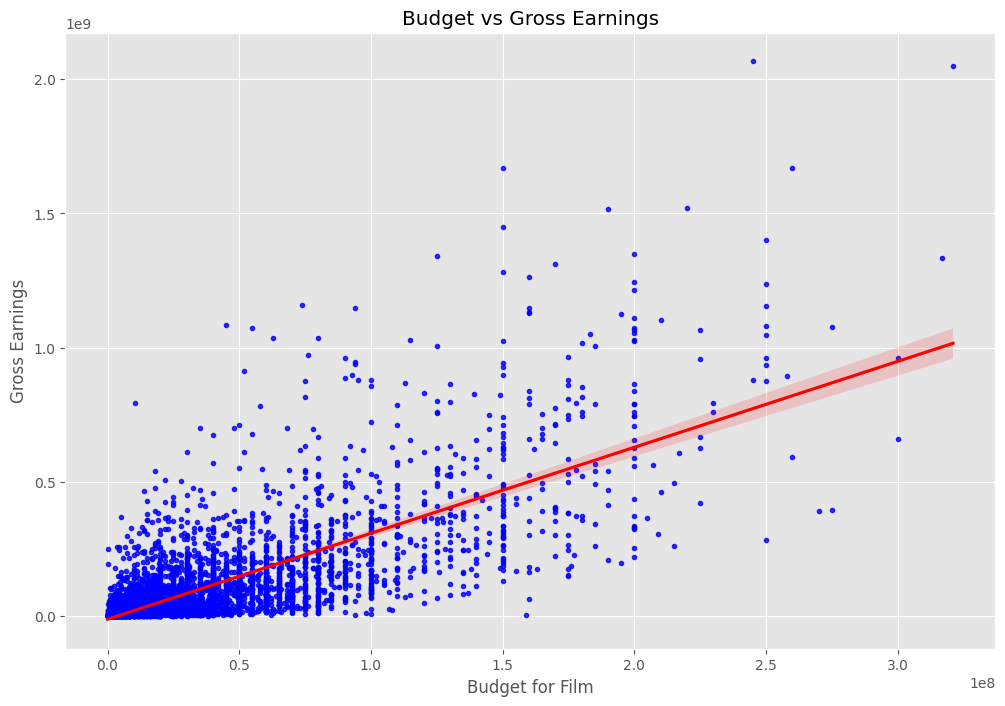

In [64]:
## Plot Budget vs Gross income using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'},marker='.')
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show()

The correlation between gross and score is: 0.2217011531183997


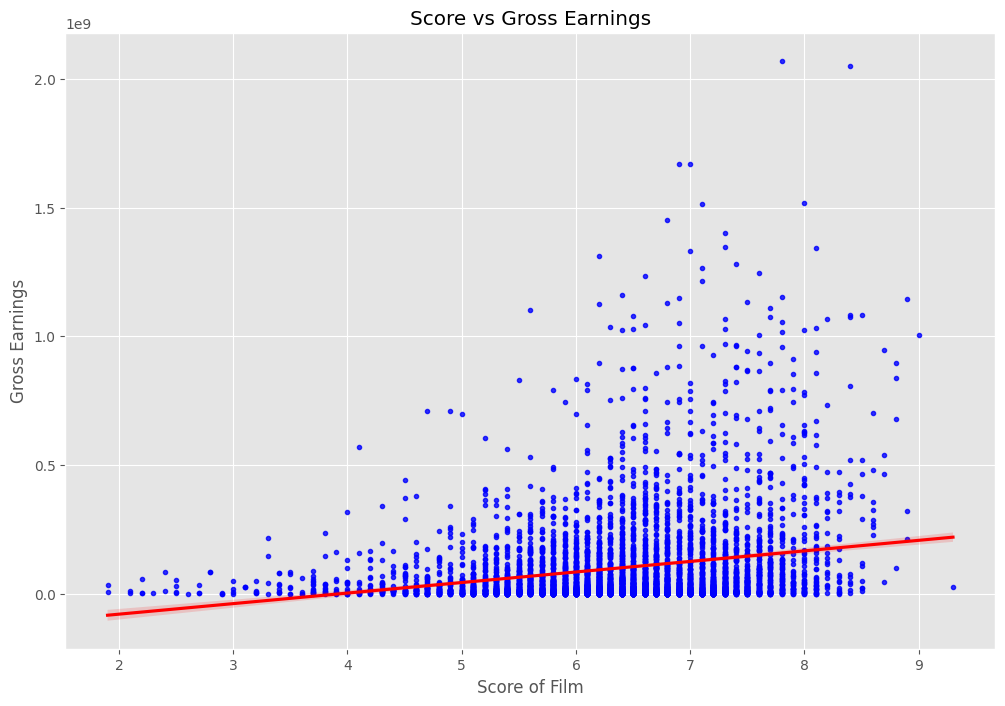

In [66]:
## Plot Score vs Gross income using seaborn
sns.regplot(x="score", y="gross", data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'},marker='.')
plt.title('Score vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Score of Film')
correlation = df['score'].corr(df['gross'])
print('The correlation between gross and score is: {}'.format(correlation))
plt.show()

#### Let's find out which columns have a correlation with others.

In [50]:
##  We wanna change all columns with datatype = object to categories so we can use this columns as well to find correlations

df_numerized=df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()
df.sample(3)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
3869,Moulin Rouge!,PG-13,Drama,2001,"June 1, 2001 (United States)",7.6,271000.0,Baz Luhrmann,Baz Luhrmann,Nicole Kidman,Australia,50000000,184935320,Twentieth Century Fox,127.0,2001
3251,Wild Things,R,Crime,1998,"March 20, 1998 (United States)",6.5,112000.0,John McNaughton,Stephen Peters,Kevin Bacon,United States,20000000,30166293,Mandalay Entertainment,108.0,1998
1987,Another You,R,Comedy,1991,"July 26, 1991 (United States)",5.4,3700.0,Maurice Phillips,Ziggy Steinberg,Richard Pryor,United States,17000000,2865916,TriStar Pictures,98.0,1991


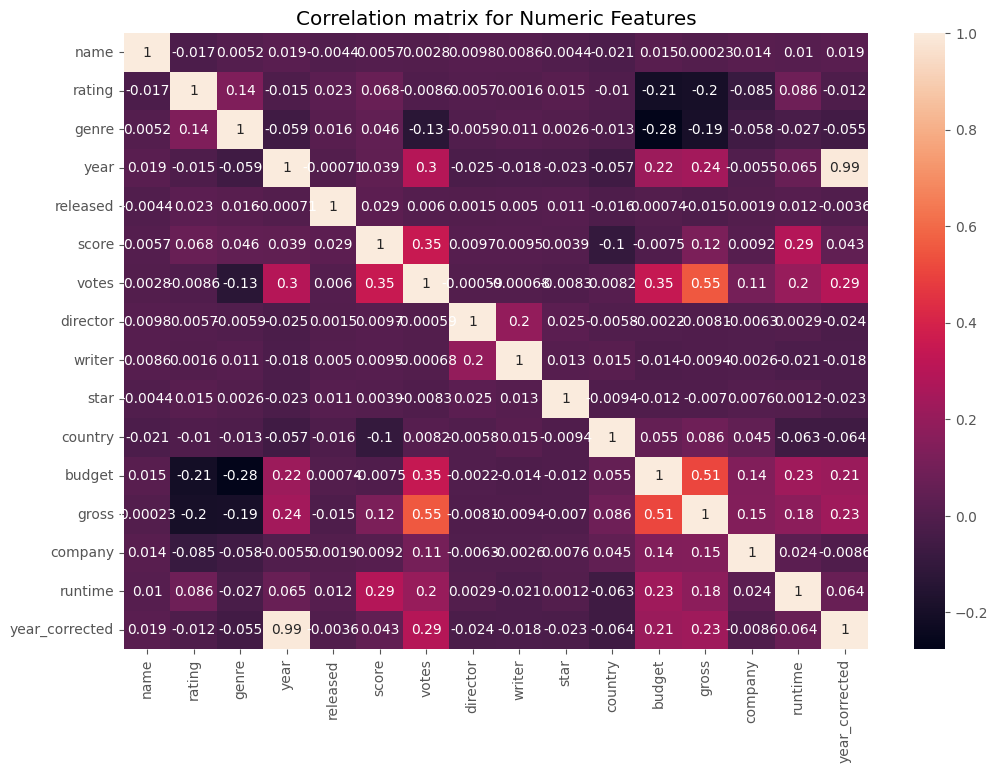

In [69]:
## Create a correlation matrix for all the columns.

correlation_matrix=df_numerized.corr(numeric_only=True,method='kendall')
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.show()

In [73]:
## Print pairs with a high correlation:

high_correlation_pairs = upper_tri.stack()[lambda x: (x > 0.4) & (x < 0.99)]
print(high_correlation_pairs)


votes   gross    0.553146
budget  gross    0.511521
dtype: float64


Therefore we see, that votes-gross income & budget-gross income are the 2 most correlated features. More budget and more votes correlates with a movie making more gross income.

##### Let's see which companies make the most gross income.

In [74]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Walt Disney Pictures         35833650748
Twentieth Century Fox        34493679836
New Line Cinema              19612851164
Marvel Studios               12268091083
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

#### What genres make the most money and what is the median earning per movie?

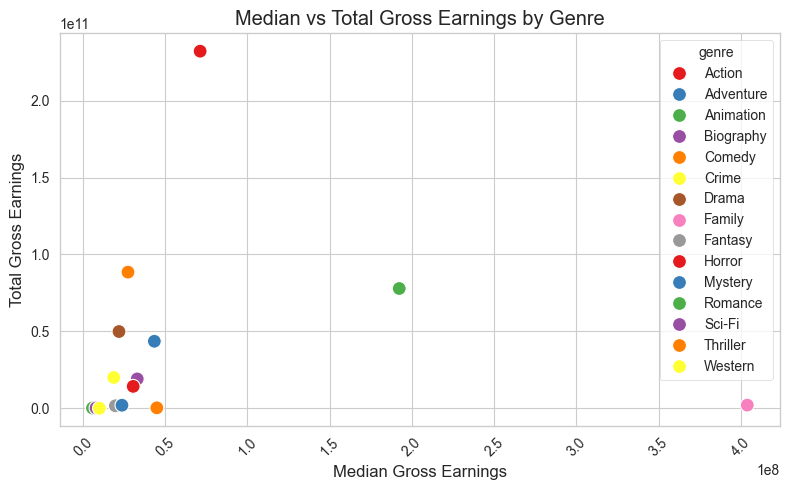

In [112]:
genre_stats = df.groupby('genre')['gross'].agg(['sum', 'mean', 'median', 'std']).reset_index()

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x='median', y='sum', data=genre_stats,hue='genre',palette='Set1',s=100)

# Rotate labels
plt.xticks(rotation=45)  

# Title and labels
plt.title('Median vs Total Gross Earnings by Genre')
plt.xlabel('Median Gross Earnings')
plt.ylabel('Total Gross Earnings')
plt.tight_layout() 
plt.show()


We can see that movies within the Action Genre make by far the most amount of money. Even If you look at median gross income the genre is clearly the number 2. On first place are by far movies from the Romance genre. Their median gross earnings are more than double as high as Nr.2 Action and more than 3.5 as big as the rest of all the genres.